# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
checkout_1 = pd.read_csv("DataSet/checkout_1.csv")
checkout_2 = pd.read_csv("DataSet/checkout_2.csv")

# Data Transformation

In [3]:
checkout_1['time'] = checkout_1['time'].str.replace('h', '', regex=False)
checkout_2['time'] = checkout_2['time'].str.replace('h', '', regex=False)

In [4]:
checkout_1['time'] = checkout_1['time'].astype(int)
checkout_2['time'] = checkout_2['time'].astype(int)

In [5]:
#Preview checkout 1
checkout_1.head(5)

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,0,9,12,11,6.42,4.85
1,1,3,5,1,1.85,1.92
2,2,1,0,0,0.28,0.82
3,3,1,0,0,0.42,0.46
4,4,0,0,1,0.42,0.21


In [6]:
#Preview checkout 2
checkout_2.head(5)

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,0,6,9,5,5.00,4.92
1,1,3,3,2,2.00,1.92
2,2,3,1,2,0.42,0.75
3,3,0,1,1,0.42,0.46
4,4,0,0,0,0.14,0.21


# Data Enrichment

**Creating variables as: to enrich the database and facilitate analysis.**

In [7]:
#Checkout1
checkout_1['total_today'] = sum(checkout_1['today'])

checkout_1['pct_Today_per_hour'] = (checkout_1['today'] / checkout_1['total_today'])*100

checkout_1['total_per_hour'] =  checkout_1[['yesterday', 'same_day_last_week', 'avg_last_week', 'avg_last_month']].sum(axis=1)

checkout_1['total_general'] = sum(checkout_1['total_per_hour'])

checkout_1['pct_Total_per_hour'] = (checkout_1['total_per_hour']/checkout_1['total_general'])*100

#Checkout2
checkout_2['total_today'] = sum(checkout_2['today'])

checkout_2['pct_Today_per_hour'] = (checkout_2['today'] / checkout_2['total_today'])*100

checkout_2['total_per_hour'] =  checkout_2[[ 'yesterday', 'same_day_last_week', 'avg_last_week', 'avg_last_month']].sum(axis=1)

checkout_2['total_general'] = sum(checkout_2['total_per_hour'])

checkout_2['pct_Total_per_hour'] = (checkout_2['total_per_hour']/checkout_2['total_general'])*100

In [8]:
#Drop auxiliary columns
columns_to_remove = ["total_today", "total_per_hour", "total_general"]
checkout_1 = checkout_1.drop(columns_to_remove, axis=1)
checkout_2 = checkout_2.drop(columns_to_remove, axis=1)

In [9]:
#Checking out 
checkout_1.head(25)

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,pct_Today_per_hour,pct_Total_per_hour
0,0,9,12,11,6.42,4.85,1.711027,1.885319
1,1,3,5,1,1.85,1.92,0.570342,0.537484
2,2,1,0,0,0.28,0.82,0.190114,0.060515
3,3,1,0,0,0.42,0.46,0.190114,0.048412
4,4,0,0,1,0.42,0.21,0.000000,0.089672
5,5,1,1,2,1.28,0.75,0.190114,0.276719
6,6,1,1,5,2.85,2.28,0.190114,0.612302
7,7,2,3,9,5.57,5.21,0.380228,1.253211
8,8,0,1,18,8.71,10.42,0.000000,2.097671
9,9,2,9,30,20.00,19.07,0.380228,4.294917


In [10]:
#Checking out 
checkout_2.head(25)

,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month,pct_Today_per_hour,pct_Total_per_hour
0,0,6,9,5,5.000,4.92,1.405152,1.450491
1,1,3,3,2,2.000,1.92,0.702576,0.540902
2,2,3,1,2,0.420,0.75,0.702576,0.252866
3,3,0,1,1,0.420,0.46,0.000000,0.174641
4,4,0,0,0,0.140,0.21,0.000000,0.021224
5,5,2,1,1,0.710,0.71,0.468384,0.207386
6,6,3,1,2,1.420,2.10,0.702576,0.395368
7,7,10,2,9,3.000,5.03,2.341920,1.153965
8,8,25,0,12,3.710,9.82,5.854801,1.548120
9,9,36,2,27,10.140,17.64,8.430913,3.443096


# Plotting the graphs checkout 1

**Plotting a bar graph to analyze the 5 variables(today,yesterday,same_day_last_week,avg_last_week,avg_last_month) available per time.**

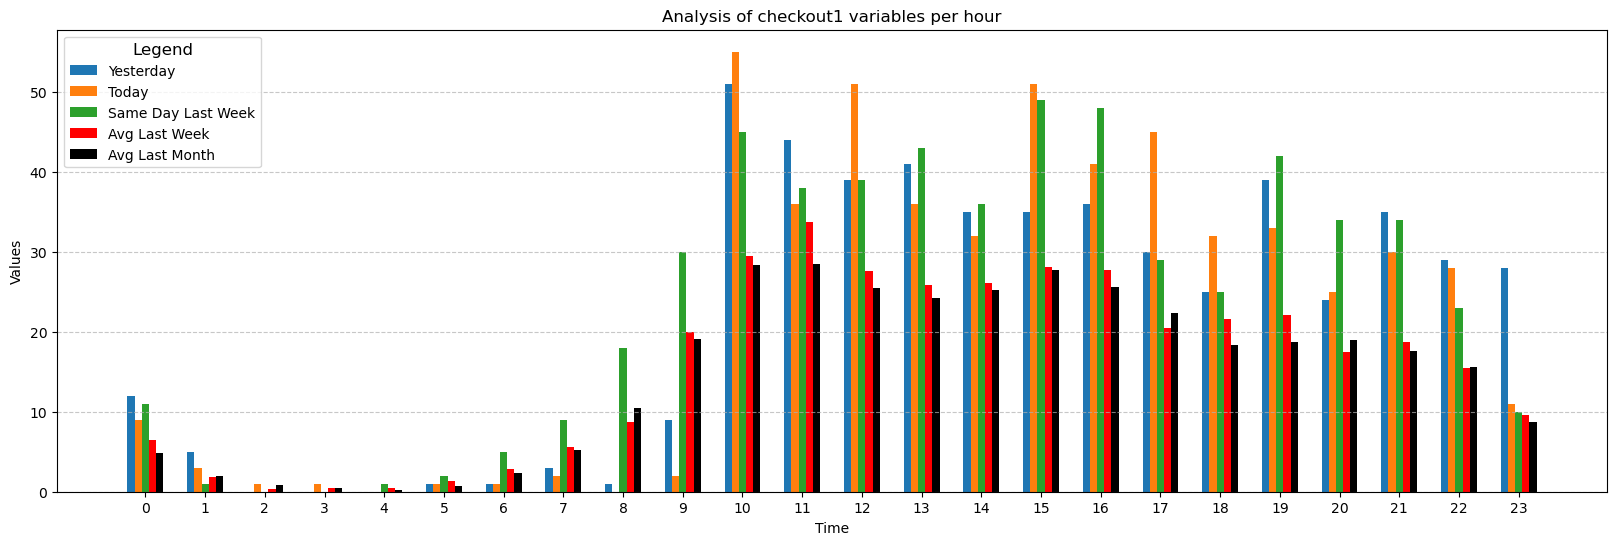

In [11]:
# Bar width for individual bars
bar_width = 0.12

# Create a larger figure
plt.figure(figsize=(20, 6))

# Define colors for bars and lines
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c','red', 'black']
line_colors = ['purple','orange']

# Create the bar chart for 'yesterday' and 'today'
plt.bar([i - 2*bar_width for i in checkout_1.time], checkout_1.yesterday, width=bar_width, label='Yesterday', color=bar_colors[0])
plt.bar([i - bar_width for i in checkout_1.time], checkout_1.today, width=bar_width, label='Today', color=bar_colors[1])
plt.bar([i for i in checkout_1.time], checkout_1.same_day_last_week, width=bar_width, label='Same Day Last Week', color=bar_colors[2])
plt.bar([i + bar_width for i in checkout_1.time], checkout_1.avg_last_week, width=bar_width, label='Avg Last Week', color=bar_colors[3])
plt.bar([i + 2*bar_width for i in checkout_1.time], checkout_1.avg_last_month, width=bar_width, label='Avg Last Month', color=bar_colors[4])
# Create the line chart centered within the bars
#plt.plot([i - bar_width for i in checkout_1["time"]], checkout_1["pct_Today_per_hour"], marker='o', linestyle='-', color=line_colors[0], label='Pct Today per Hour')
#plt.plot(checkout_1["time"], checkout_1["pct_Total_per_hour"], marker='o', linestyle='-', color=line_colors[1], label='Pct Total per Hour')

# Set x-axis labels at the middle of each pair of bars
plt.xticks(checkout_1.time)

# Add labels to the axes and a title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Analysis of checkout1 variables per hour')

# Add a legend with improved formatting
plt.legend(loc='upper left', title='Legend', title_fontsize=12, fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart as an image
plt.savefig('checkout_chart.png')

# Display the chart
plt.show()

**Plotting a line graph to analyze the behavior of today's and total checkouts per time.**

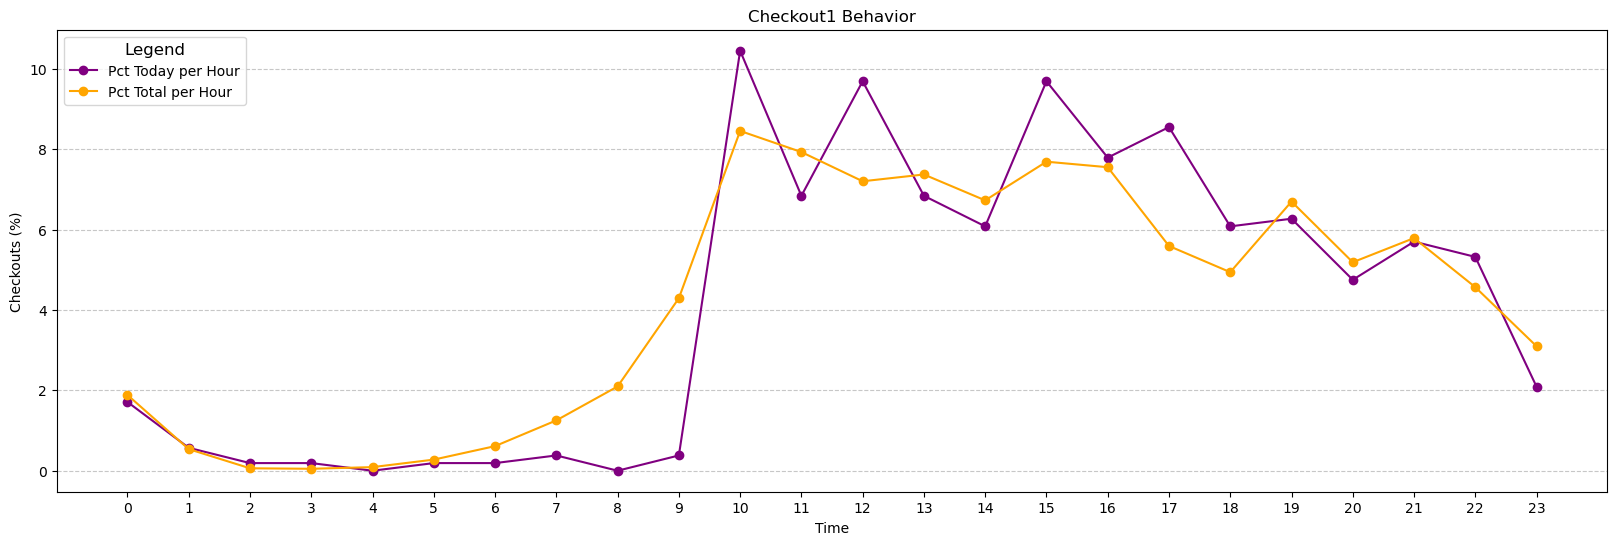

In [12]:
## Create a larger figure
plt.figure(figsize=(20, 6))

# Create the line chart
plt.plot(checkout_1["time"], checkout_1["pct_Today_per_hour"], marker='o', linestyle='-', color=line_colors[0], label='Pct Today per Hour')
plt.plot(checkout_1["time"], checkout_1["pct_Total_per_hour"], marker='o', linestyle='-', color=line_colors[1], label='Pct Total per Hour')

# Set x-axis labels at the middle of each pair of bars
plt.xticks(checkout_1.time)
# Add labels to the axes and a title
plt.xlabel('Time')
plt.ylabel('Checkouts (%)')
plt.title('Checkout1 Behavior')

# Add a legend with improved formatting
plt.legend(loc='upper left', title='Legend', title_fontsize=12, fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart as an image
plt.savefig('checkout_chart.png')

# Display the chart
plt.show()


# Plotting the graphs checkout 2

**Plotting a bar graph to analyze the 5 variables(today,yesterday,same_day_last_week,avg_last_week,avg_last_month) available per time.**

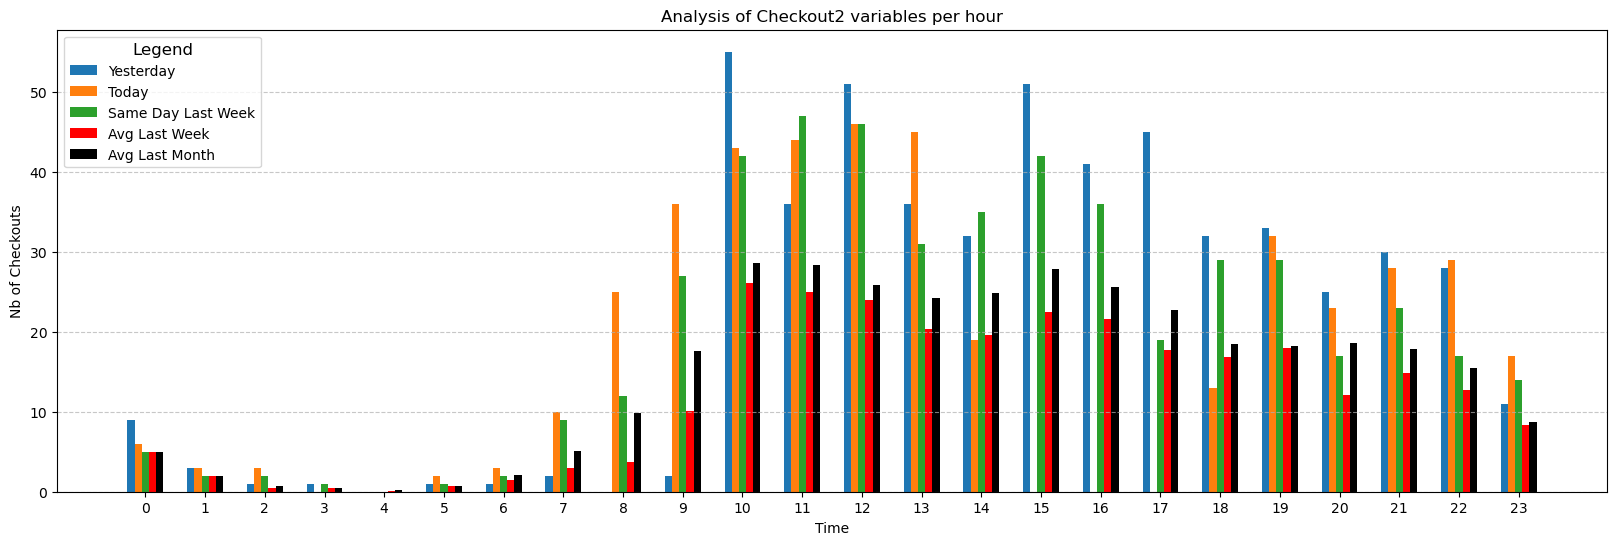

In [13]:
# Bar width for individual bars
bar_width = 0.12

# Create a larger figure
plt.figure(figsize=(20, 6))

# Define colors for bars and lines
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c','red', 'black']
line_colors = ['purple','orange']

# Create the bar chart for 'yesterday' and 'today'
plt.bar([i - 2*bar_width for i in checkout_2.time], checkout_2.yesterday, width=bar_width, label='Yesterday', color=bar_colors[0])
plt.bar([i - bar_width for i in checkout_2.time], checkout_2.today, width=bar_width, label='Today', color=bar_colors[1])
plt.bar([i for i in checkout_2.time], checkout_2.same_day_last_week, width=bar_width, label='Same Day Last Week', color=bar_colors[2])
plt.bar([i + bar_width for i in checkout_2.time], checkout_2.avg_last_week, width=bar_width, label='Avg Last Week', color=bar_colors[3])
plt.bar([i + 2*bar_width for i in checkout_2.time], checkout_2.avg_last_month, width=bar_width, label='Avg Last Month', color=bar_colors[4])

# Set x-axis labels at the middle of each pair of bars
plt.xticks(checkout_2.time)

# Add labels to the axes and a title
plt.xlabel('Time')
plt.ylabel('Nb of Checkouts')
plt.title('Analysis of Checkout2 variables per hour')

# Add a legend with improved formatting
plt.legend(loc='upper left', title='Legend', title_fontsize=12, fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart as an image
#plt.savefig('checkout_chart.png')

# Display the chart
plt.show()

**Plotting a line graph to analyze the behavior of today's and total checkouts per time.**

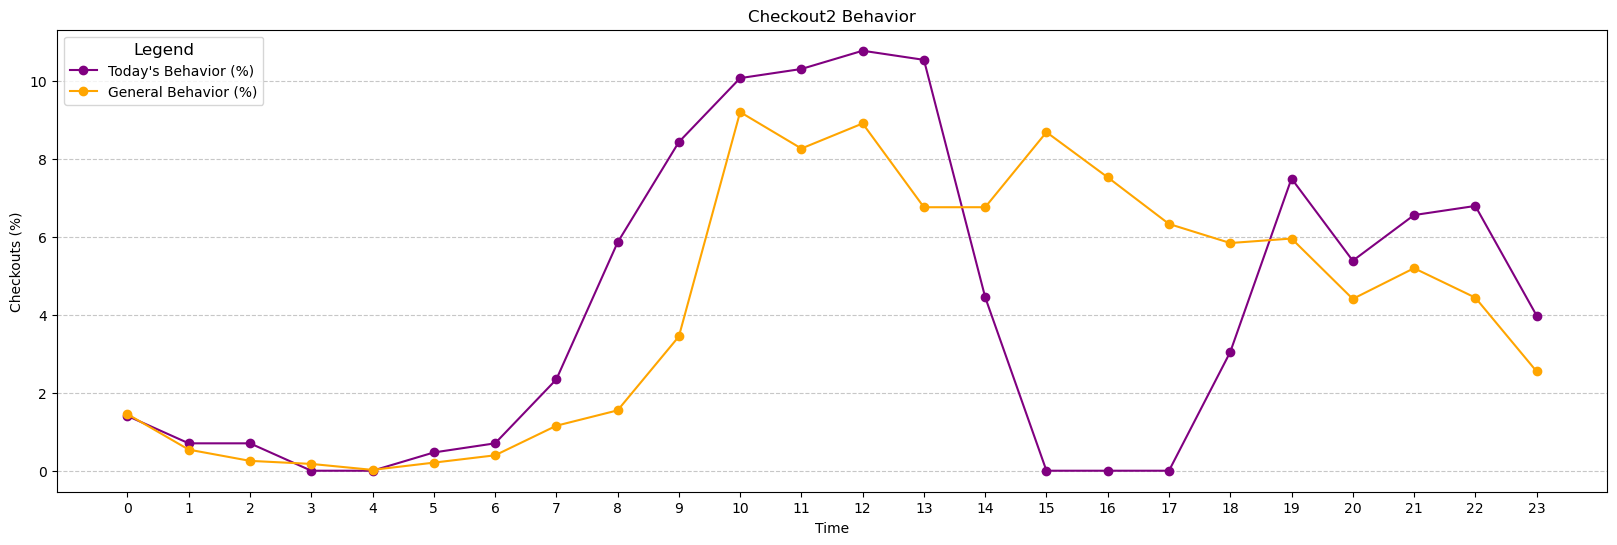

In [14]:
## Create a larger figure
plt.figure(figsize=(20, 6))

# Create the line chart
plt.plot(checkout_2["time"], checkout_2["pct_Today_per_hour"], marker='o', linestyle='-', color=line_colors[0], label="Today's Behavior (%)")
plt.plot(checkout_2["time"], checkout_2["pct_Total_per_hour"], marker='o', linestyle='-', color=line_colors[1], label='General Behavior (%)')

# Set x-axis labels at the middle of each pair of bars
plt.xticks(checkout_2.time)
# Add labels to the axes and a title
plt.xlabel('Time')
plt.ylabel('Checkouts (%)')
plt.title('Checkout2 Behavior')

# Add a legend with improved formatting
plt.legend(loc='upper left', title='Legend', title_fontsize=12, fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the chart as an image
#plt.savefig('checkout_chart.png')

# Display the chart
plt.show()

